In [1]:
# pip install pandas-profiling

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# добавляем в графики красивости seaborn:
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

import pandas_profiling

pd.set_option('display.max_columns', 200)

In [3]:
#загрузка данных
data = pd.read_csv('https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1TPaBgFKxPhXCaVrdmHnb9wvoYcZESfBO')

In [4]:
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52
0,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,P201,P202,P203,P204,P205,P206,DPIT301,FIT301,LIT301,MV301,MV302,MV303,MV304,P301,P302,AIT401,AIT402,FIT401,LIT401,P401,P402,P403,P404,UV401,AIT501,AIT502,AIT503,AIT504,FIT501,FIT502,FIT503,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
1,28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,2,1,1,2,1,2,1,19.74838,2.206835,956.1651,1,2,1,1,1,2,148.808,156.0882,1.713517,942.0662,1,2,1,1,2,7.878621,145.1166,264.5475,12.03538,1.723789,1.279621,0.7352687,0.3077859,2,1,250.8652,1.649953,189.5988,0.000128152,1,1,1,Normal
2,28/12/2015 10:00:01 AM,2.446274,522.886,2,2,1,262.0161,8.396437,328.6337,2.445391,2,1,1,2,1,2,1,19.74838,2.208244,956.1651,1,2,1,1,1,2,148.808,156.0882,1.715952,942.0277,1,2,1,1,2,7.878621,145.1166,264.5475,12.03538,1.723789,1.297554,0.7352687,0.3077859,2,1,250.8652,1.649953,189.6789,0.000128152,1,1,1,Normal
3,28/12/2015 10:00:02 AM,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,2,1,1,2,1,2,1,19.69076,2.208628,956.4855,1,2,1,1,1,2,148.808,156.0882,1.715952,941.8739,1,2,1,1,2,7.878621,145.1166,264.5475,12.03538,1.723404,1.293967,0.7352687,0.3086186,2,1,250.8812,1.649953,189.6789,0.000128152,1,1,1,Normal
4,28/12/2015 10:00:03 AM,2.53435,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,2,1,1,2,1,2,1,19.69076,2.208628,956.806,1,2,1,1,1,2,148.808,156.0882,1.71467,941.797,1,2,1,1,2,7.878621,145.0141,264.5475,12.03538,1.723404,1.281158,0.7352687,0.3086186,2,1,250.8812,1.649953,189.6148,0.000128152,1,1,1,Normal


In [5]:
# Сделаем первую строку названиями столбцов
data.columns = data.iloc[0]
data = data.reindex(data.index.drop(0))
data.head()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,P201,P202,P203,P204,P205,P206,DPIT301,FIT301,LIT301,MV301,MV302,MV303,MV304,P301,P302,AIT401,AIT402,FIT401,LIT401,P401,P402,P403,P404,UV401,AIT501,AIT502,AIT503,AIT504,FIT501,FIT502,FIT503,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
1,28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,2,1,1,2,1,2,1,19.74838,2.206835,956.1651,1,2,1,1,1,2,148.808,156.0882,1.713517,942.0662,1,2,1,1,2,7.878621,145.1166,264.5475,12.03538,1.723789,1.279621,0.7352687,0.3077859,2,1,250.8652,1.649953,189.5988,0.000128152,1,1,1,Normal
2,28/12/2015 10:00:01 AM,2.446274,522.886,2,2,1,262.0161,8.396437,328.6337,2.445391,2,1,1,2,1,2,1,19.74838,2.208244,956.1651,1,2,1,1,1,2,148.808,156.0882,1.715952,942.0277,1,2,1,1,2,7.878621,145.1166,264.5475,12.03538,1.723789,1.297554,0.7352687,0.3077859,2,1,250.8652,1.649953,189.6789,0.000128152,1,1,1,Normal
3,28/12/2015 10:00:02 AM,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,2,1,1,2,1,2,1,19.69076,2.208628,956.4855,1,2,1,1,1,2,148.808,156.0882,1.715952,941.8739,1,2,1,1,2,7.878621,145.1166,264.5475,12.03538,1.723404,1.293967,0.7352687,0.3086186,2,1,250.8812,1.649953,189.6789,0.000128152,1,1,1,Normal
4,28/12/2015 10:00:03 AM,2.53435,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,2,1,1,2,1,2,1,19.69076,2.208628,956.806,1,2,1,1,1,2,148.808,156.0882,1.71467,941.797,1,2,1,1,2,7.878621,145.0141,264.5475,12.03538,1.723404,1.281158,0.7352687,0.3086186,2,1,250.8812,1.649953,189.6148,0.000128152,1,1,1,Normal
5,28/12/2015 10:00:04 AM,2.56926,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,2,1,1,2,1,2,1,19.69076,2.208628,957.0864,1,2,1,1,1,2,148.808,156.0882,1.71467,942.22,1,2,1,1,2,7.878621,144.8859,264.5475,12.03538,1.723404,1.281158,0.7352687,0.3086186,2,1,250.8812,1.649953,189.5027,0.000128152,1,1,1,Normal


In [6]:
print("Размер датасета data:", data.shape)
print()
data.info()

Размер датасета data: (449919, 53)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449919 entries, 1 to 449919
Data columns (total 53 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0    Timestamp     449919 non-null  object
 1   FIT101         449919 non-null  object
 2   LIT101         449919 non-null  object
 3    MV101         449919 non-null  object
 4   P101           449919 non-null  object
 5   P102           449919 non-null  object
 6    AIT201        449919 non-null  object
 7   AIT202         449919 non-null  object
 8   AIT203         449919 non-null  object
 9   FIT201         449919 non-null  object
 10   MV201         449919 non-null  object
 11   P201          449919 non-null  object
 12   P202          449919 non-null  object
 13  P203           449919 non-null  object
 14   P204          449919 non-null  object
 15  P205           449919 non-null  object
 16  P206           449919 non-null  object
 17  DPIT301     

In [7]:
# Убрать пустые пространства из названия столбцов
data.columns = data.columns.str.replace(' ', '')

In [8]:
# Перевести все данные, которые воможно в цифровой формат
df = data.apply(pd.to_numeric, errors='ignore') 

In [9]:
print("Размер датасета data:", df.shape)
print()
df.info()

Размер датасета data: (449919, 53)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449919 entries, 1 to 449919
Data columns (total 53 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      449919 non-null  object 
 1   FIT101         449919 non-null  float64
 2   LIT101         449919 non-null  float64
 3   MV101          449919 non-null  int64  
 4   P101           449919 non-null  int64  
 5   P102           449919 non-null  int64  
 6   AIT201         449919 non-null  float64
 7   AIT202         449919 non-null  float64
 8   AIT203         449919 non-null  float64
 9   FIT201         449919 non-null  float64
 10  MV201          449919 non-null  int64  
 11  P201           449919 non-null  int64  
 12  P202           449919 non-null  int64  
 13  P203           449919 non-null  int64  
 14  P204           449919 non-null  int64  
 15  P205           449919 non-null  int64  
 16  P206           449919 non-null  int64 

In [10]:
# Переведем данные столбца 'Timestamp' в формат времени
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [11]:
df.describe()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,P201,P202,P203,P204,P205,P206,DPIT301,FIT301,LIT301,MV301,MV302,MV303,MV304,P301,P302,AIT401,AIT402,FIT401,LIT401,P401,P402,P403,P404,UV401,AIT501,AIT502,AIT503,AIT504,FIT501,FIT502,FIT503,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
count,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.0,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.0,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.0,449919.000000,449919.000000,449919.0,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.0,449919.000000,449919.000000,449919.000000,449919.000000,449919.0,449919.000000,449919.0
mean,1.714346,607.019967,1.665335,1.693251,1.006946,210.297302,8.528535,320.301478,1.702908,1.691584,1.121068,1.0,1.690689,1.000124,1.691131,1.000122,15.827634,1.713555,910.076801,1.007321,1.749655,1.023349,1.101163,1.0,1.772946,148.805855,161.990135,1.590214,833.542913,1.0,1.928792,1.000133,1.0,1.925849,7.787358,147.509939,264.789668,14.504030,1.603014,1.195462,0.679549,0.283806,1.925862,1.0,232.173817,1.013408,174.714484,0.016566,1.0,1.009099,1.0
std,1.191716,125.303003,0.482323,0.461145,0.083051,35.157909,0.114844,16.631029,1.130277,0.470611,0.326207,0.0,0.462210,0.011156,0.462027,0.011056,7.740243,0.907519,80.522063,0.122666,0.448330,0.181441,0.324082,0.0,0.418928,0.003889,44.740211,0.449035,186.068540,0.0,0.257173,0.011547,0.0,0.262017,0.084308,21.429151,6.542092,7.944618,0.444681,0.331968,0.189503,0.080924,0.261995,0.0,61.750930,0.412723,47.479809,0.159603,0.0,0.094956,0.0
min,0.000000,189.826300,0.000000,1.000000,1.000000,168.033800,6.000000,285.337100,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,364.386300,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,148.759900,140.835700,0.000000,243.014600,1.0,1.000000,1.000000,1.0,1.000000,7.432902,129.838500,244.873100,9.536016,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,9.468726,0.000000,3.140220,0.000000,1.0,1.000000,1.0
25%,0.000000,510.011100,1.000000,1.000000,1.000000,177.102000,8.441618,306.383000,0.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,19.316220,2.194664,836.444200,1.000000,2.000000,1.000000,1.000000,1.0,2.000000,148.803200,146.116400,1.710441,819.097700,1.0,2.000000,1.000000,1.0,2.000000,7.772879,138.990000,259.965400,13.035120,1.719559,1.272576,0.730660,0.306249,2.000000,1.0,248.029400,0.816967,186.698900,0.000000,1.0,1.000000,1.0
50%,2.477020,530.422500,2.000000,2.000000,1.000000,193.508100,8.551525,321.661100,2.446673,2.000000,1.000000,1.0,2.000000,1.000000,2.000000,1.000000,19.898840,2.201582,924.682800,1.000000,2.000000,1.000000,1.000000,1.0,2.000000,148.808000,150.166600,1.717361,884.427100,1.0,2.000000,1.000000,1.0,2.000000,7.797873,142.912100,264.387300,14.611640,1.726993,1.286410,0.732708,0.306633,2.000000,1.0,249.295100,0.961138,187.724300,0.000000,1.0,1.000000,1.0
75%,2.577907,727.432100,2.000000,2.000000,1.000000,253.845200,8.610806,331.684200,2.454362,2.000000,1.000000,1.0,2.000000,1.000000,2.000000,1.000000,20.116530,2.207091,977.794200,1.000000,2.000000,1.000000,1.000000,1.0,2.000000,148.808000,153.652900,1.724153,937.375100,1.0,2.000000,1.000000,1.0,2.000000,7.840810,144.706500,269.129700,15.419120,1.733145,1.300115,0.734885,0.308106,2.000000,1.0,250.881200,1.409669,189.118200,0.000128,1.0,1.000000,1.0
max,2.760145,925.032300,2.000000,2.000000,2.000000,267.719800,8.733210,384.465500,2.826899,2.000000,2.000000,1.0,2.000000,2.000000,2.000000,2.000000,45.000000,2.376197,1201.000000,2.000000,2.000000,2.000000,2.000000,1.0,2.000000,148.856100,333.811800,1.744914,1002.781000,1.0,2.000000,2.000000,1.0,2.000000,

In [12]:
# Переименуем нашу целевую переменную
df = df.rename(columns={'Normal/Attack':'target'})

In [13]:
# Уберем пустые пространства в написании значения целевой переменной
df.target = df.target.apply(lambda x: 'Attack' if x == 'A ttack' else x)

In [14]:
# Заменим значения таргета на 0 и 1
df['target'].replace({'Normal':0, 'Attack':1}, inplace=True)

In [15]:
# Переведем время в unixTime
df['unixTime'] = df['Timestamp'].apply(lambda x: x.timestamp())
s = pd.Series(df['unixTime'])
# df['diff'] = s.diff().fillna(s)
# df.style.format({'unixTime': '{:.2f}'}) -- у меня форматирование на таком количесве строк виснет правда

In [16]:
# создадим новые признаки из признака Timestamp
df['day_sin'] = df['Timestamp'].apply(lambda x: np.sin(2 * np.pi * x.timetuple().tm_yday/365.0))
df['day_cos'] = df['Timestamp'].apply(lambda x: np.cos(2 * np.pi * x.timetuple().tm_yday/365.0))

df['month_sin'] = np.sin(2 * np.pi * df['Timestamp'].dt.month/12.0)
df['month_cos'] = np.cos(2 * np.pi * df['Timestamp'].dt.month/12.0)

df['hour_sin'] = df['Timestamp'].apply(lambda x: np.sin(2 * np.pi * x.hour/24.0))
df['hour_cos'] = df['Timestamp'].apply(lambda x: np.cos(2 * np.pi * x.hour/24.0))

In [17]:
# Удалим колонку Timestamp
df.drop('Timestamp', axis=1, inplace=True)


In [18]:
# разделим датасет на test и train
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,train_size=0.6,random_state=42)
print('Размер df_train:', df_train.shape,',', round(len(df_train)/len(df)*100,2), '% от датасета df')
print('Размер df_test:', df_test.shape,',', round(len(df_test)/len(df)*100,2), '% от датасета df')

Размер df_train: (269951, 59) , 60.0 % от датасета df
Размер df_test: (179968, 59) , 40.0 % от датасета df


In [19]:
## Установка lightautoml
# !pip install -U lightautoml

In [20]:
# Standard python libraries
import os
import time

# Essential DS libraries
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import torch

# LightAutoML presets, task and report generation
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task
from lightautoml.report.report_deco import ReportDeco

In [21]:
N_THREADS = 4
N_FOLDS = 5
RANDOM_STATE = 42
TEST_SIZE = 0.3
TIMEOUT = 900
TARGET_NAME = 'target'

In [22]:
task = Task('binary', loss = 'logloss', metric = 'auc')

In [23]:
roles = {
    'target': TARGET_NAME
}
# roles = {
#     'target': TARGET_NAME,
#     'drop': ['sell_id','Комплектация', 'start_date', 'model', 'HAS_OPTION_abs', 'HAS_OPTION_airbag-driver','HAS_OPTION_lock']
# }

In [24]:
automl = TabularAutoML(
    task = task, 
    timeout = TIMEOUT,
    cpu_limit = N_THREADS,
    reader_params = {'n_jobs': N_THREADS, 'cv': N_FOLDS, 'random_state': RANDOM_STATE}
)

In [25]:
# обучение модели
oof_pred = automl.fit_predict(df_train, roles = roles, verbose = 3)

[09:52:32] Stdout logging level is INFO3.
[09:52:32] Copying TaskTimer may affect the parent PipelineTimer, so copy will create new unlimited TaskTimer
[09:52:32] Task: binary

[09:52:32] Start automl preset with listed constraints:
[09:52:32] - time: 900.00 seconds
[09:52:32] - CPU: 4 cores
[09:52:32] - memory: 16 GB

[09:52:32] Train data shape: (269951, 59)

[09:52:40] Feats was rejected during automatic roles guess: []
[09:52:40] Layer 1 train process start. Time left 892.13 secs
[09:53:05] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
[09:53:05] ===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
[09:53:06] Linear model: C = 1e-05 score = 0.999574365652411
[09:53:07] Linear model: C = 5e-05 score = 0.9997876027934095
[09:53:08] Linear model: C = 0.0001 score = 0.9998329270700401
[09:53:09] Linear model: C = 0.0005 score = 0.9998972158427076
[09:53:09] Linear model: C = 0.001 score = 0.9999092838658094
[09:53:11] Linear model: C = 0.005 score = 0.9999256513232748


[09:55:41] ===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM =====
[09:55:41] [1]	valid's auc: 0.999929
[09:55:41] Training until validation scores don't improve for 100 rounds
[09:55:45] [100]	valid's auc: 0.999994
[09:55:48] [200]	valid's auc: 0.999995
[09:55:49] ===== Start working with fold 1 for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM =====
[09:55:50] [1]	valid's auc: 0.99991
[09:55:50] Training until validation scores don't improve for 100 rounds
[09:55:54] [100]	valid's auc: 0.999996
[09:55:56] [200]	valid's auc: 0.999997
[09:55:58] [300]	valid's auc: 0.999997
[09:56:00] ===== Start working with fold 2 for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM =====
[09:56:01] [1]	valid's auc: 0.999926
[09:56:01] Training until validation scores don't improve for 100 rounds
[09:56:05] [100]	valid's auc: 0.999995
[09:56:08] [200]	valid's auc: 0.999997
[09:56:10] [300]	valid's auc: 0.999997
[09:56:11] ===== Start working with fold 3 for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM =====
[09:56:12] 

Training has stopped (degenerate solution on iteration 66, probably too small l2-regularization, try to increase it)


[09:57:10] 0:	test: 0.9950980	best: 0.9950980 (0)	total: 35.5ms	remaining: 1m 10s
[09:57:13] 99:	test: 0.9999154	best: 0.9999154 (99)	total: 3.03s	remaining: 57.6s
[09:57:16] 199:	test: 0.9999545	best: 0.9999549 (198)	total: 6.2s	remaining: 55.8s
[09:57:20] 299:	test: 0.9999699	best: 0.9999699 (299)	total: 9.28s	remaining: 52.6s
[09:57:23] 399:	test: 0.9999760	best: 0.9999760 (399)	total: 12.4s	remaining: 49.5s
[09:57:26] 499:	test: 0.9999801	best: 0.9999801 (499)	total: 15.5s	remaining: 46.4s
[09:57:29] 599:	test: 0.9999816	best: 0.9999817 (589)	total: 18.9s	remaining: 44.1s
[09:57:33] 699:	test: 0.9999833	best: 0.9999834 (695)	total: 22.3s	remaining: 41.4s
[09:57:36] 799:	test: 0.9999847	best: 0.9999847 (796)	total: 25.4s	remaining: 38.1s
[09:57:39] 899:	test: 0.9999858	best: 0.9999859 (895)	total: 28.5s	remaining: 34.8s
[09:57:42] 999:	test: 0.9999867	best: 0.9999868 (969)	total: 31.7s	remaining: 31.7s
[09:57:45] 1099:	test: 0.9999875	best: 0.9999875 (1099)	total: 34.6s	remaining: 2

[10:00:51] 2499:	test: 0.9999815	best: 0.9999815 (2492)	total: 1m 9s	remaining: 13.9s
[10:00:53] 2599:	test: 0.9999815	best: 0.9999816 (2523)	total: 1m 12s	remaining: 11.1s
[10:00:56] 2699:	test: 0.9999817	best: 0.9999817 (2682)	total: 1m 14s	remaining: 8.3s
[10:00:59] 2799:	test: 0.9999820	best: 0.9999820 (2780)	total: 1m 17s	remaining: 5.52s
[10:01:01] 2899:	test: 0.9999820	best: 0.9999821 (2869)	total: 1m 19s	remaining: 2.75s
[10:01:04] 2999:	test: 0.9999821	best: 0.9999822 (2989)	total: 1m 22s	remaining: 0us
[10:01:04] bestTest = 0.9999821522
[10:01:04] bestIteration = 2989
[10:01:04] Shrink model to first 2990 iterations.
[10:01:04] ===== Start working with fold 1 for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost =====
[10:01:04] 0:	test: 0.9910120	best: 0.9910120 (0)	total: 38.9ms	remaining: 1m 56s
[10:01:07] 99:	test: 0.9998570	best: 0.9998570 (99)	total: 2.75s	remaining: 1m 19s
[10:01:10] 199:	test: 0.9999048	best: 0.9999048 (199)	total: 5.62s	remaining: 1m 18s
[10:01:13] 299:	test: 0.9999

[10:04:51] 2099:	test: 0.9999723	best: 0.9999723 (2016)	total: 58.6s	remaining: 25.1s
[10:04:54] 2199:	test: 0.9999727	best: 0.9999727 (2197)	total: 1m 1s	remaining: 22.2s
[10:04:56] 2299:	test: 0.9999726	best: 0.9999728 (2216)	total: 1m 3s	remaining: 19.4s
[10:04:57] Stopped by overfitting detector  (100 iterations wait)
[10:04:57] bestTest = 0.9999728415
[10:04:57] bestIteration = 2216
[10:04:57] Shrink model to first 2217 iterations.
[10:04:57] ===== Start working with fold 4 for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost =====
[10:04:57] 0:	test: 0.9960617	best: 0.9960617 (0)	total: 38.9ms	remaining: 1m 56s
[10:05:00] 99:	test: 0.9998975	best: 0.9998975 (99)	total: 2.73s	remaining: 1m 19s
[10:05:03] 199:	test: 0.9999336	best: 0.9999336 (199)	total: 5.5s	remaining: 1m 17s
[10:05:06] 299:	test: 0.9999507	best: 0.9999507 (299)	total: 8.3s	remaining: 1m 14s
[10:05:08] 399:	test: 0.9999621	best: 0.9999621 (399)	total: 11.1s	remaining: 1m 12s
[10:05:11] 499:	test: 0.9999694	best: 0.9999694 (499)	

In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(df_train[TARGET_NAME], (oof_pred.data[:,0] > 0.5).astype(int))

0.9994850917388711

In [27]:
from sklearn.metrics import roc_auc_score

roc_auc_score(df_train[TARGET_NAME], (oof_pred.data[:,0] > 0.5).astype(int))

0.998601583150629

In [28]:
from sklearn.metrics import f1_score

f1_score(df_train[TARGET_NAME], (oof_pred.data[:,0] > 0.5).astype(int))


0.9978768577494691

<AxesSubplot:xlabel='Feature'>

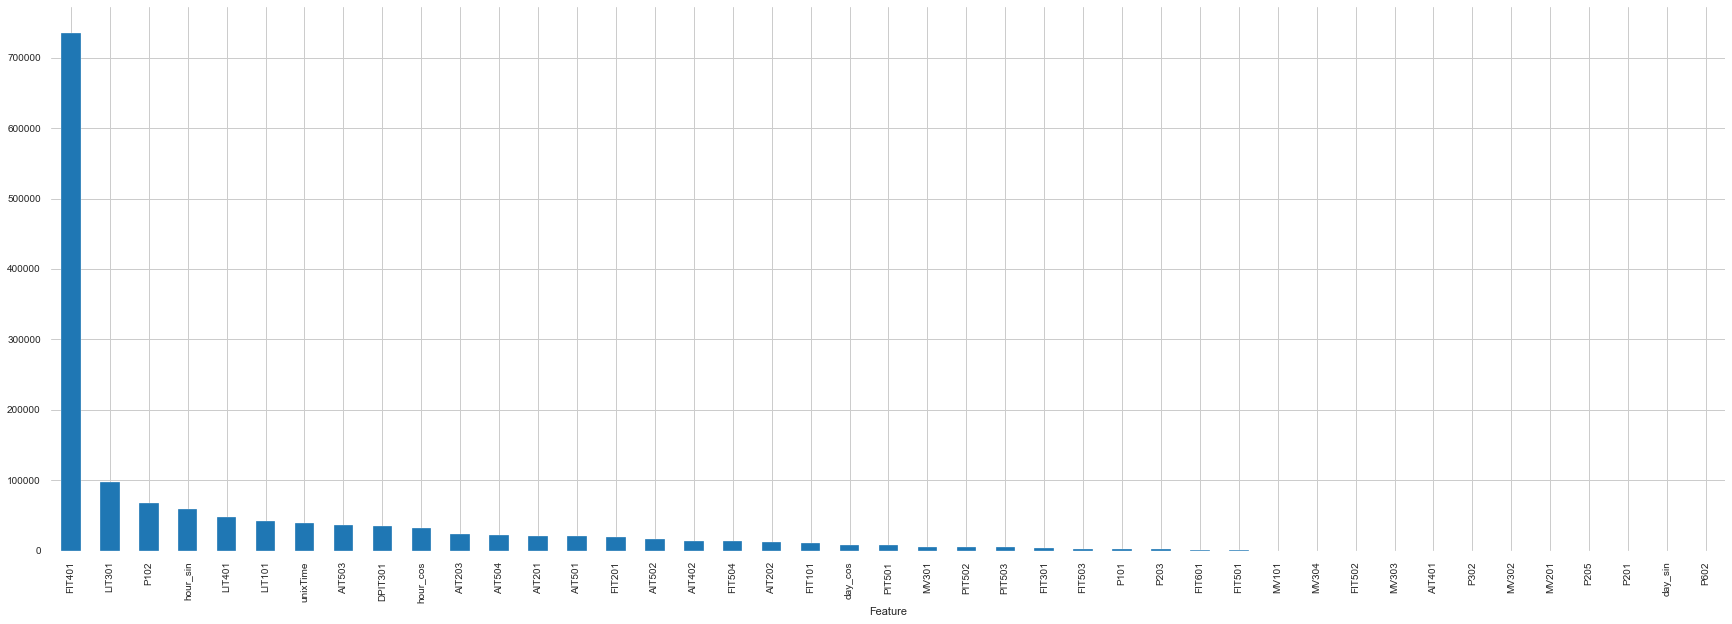

In [29]:
fast_fi = automl.get_feature_scores('fast')
fast_fi.set_index('Feature')['Importance'].plot.bar(figsize = (30, 10), grid = True)

In [30]:
from lightautoml.report.report_deco import ReportDeco
RD = ReportDeco(output_path = 'tabularAutoML_model_report')

automl_rd = RD(
    TabularAutoML(
        task = task,
        timeout = TIMEOUT,
        cpu_limit = N_THREADS,
        reader_params = {'n_jobs': N_THREADS, 'cv': N_FOLDS, 'random_state': RANDOM_STATE}
    )
)

In [31]:
%%time
oof_pred = automl_rd.fit_predict(df_train, roles = roles, verbose = 1)

[10:06:26] Stdout logging level is INFO.
[10:06:26] Task: binary

[10:06:26] Start automl preset with listed constraints:
[10:06:26] - time: 900.00 seconds
[10:06:26] - CPU: 4 cores
[10:06:26] - memory: 16 GB

[10:06:26] Train data shape: (269951, 59)

[10:06:34] Layer 1 train process start. Time left 892.62 secs
[10:06:58] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
[10:07:33] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = 0.9999323481178684
[10:07:33] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed
[10:07:33] Time left 833.79 secs

[10:07:51] Selector_LightGBM fitting and predicting completed
[10:08:14] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...
[10:09:20] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = 0.9999945586635057
[10:09:20] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed
[10:09:20] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 1.00 secs
[10:09:29] Hyperparameters optimization for Lvl_0_

Training has stopped (degenerate solution on iteration 66, probably too small l2-regularization, try to increase it)


[10:12:40] Fitting Lvl_0_Pipe_1_Mod_2_CatBoost finished. score = 0.9997940653863284
[10:12:40] Lvl_0_Pipe_1_Mod_2_CatBoost fitting and predicting completed
[10:12:40] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ... Time budget is 1.00 secs
[10:13:27] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost completed
[10:13:27] Start fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ...
[10:20:02] Fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost finished. score = 0.9999842962171427
[10:20:02] Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost fitting and predicting completed
[10:20:02] Time left 84.38 secs

[10:20:02] Layer 1 training completed.

[10:20:02] Blending: optimization starts with equal weights and score 0.999977443858639
[10:20:05] Blending: iteration 0: score = 0.9999964559030253, weights = [0. 0. 1. 0. 0.]
[10:20:08] Blending: iteration 1: score = 0.9999964559030253, weights = [0. 0. 1. 0. 0.]
[10:20:08] Blending: no score update. Terminated

[10:20:08] Automl prese

In [32]:
test_pred = automl_rd.predict(df_test)

In [33]:
accuracy_score(df_test[TARGET_NAME], (test_pred.data[:,0] > 0.5).astype(int))

0.9996888335704125

Модель показала хороший результат как на тренировочных, так и на тестовых данных,
accuracy_score на тесте равен 0.9996888335704125. 